# Task 51

## Exploring the data

In [30]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("UsArrests.csv")
df.head()



,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.20,236,58,21.20
1,Alaska,10.00,263,48,44.50
2,Arizona,8.10,294,80,31.00
3,Arkansas,8.80,190,50,19.50
4,California,9.00,276,91,40.60


This data appears fairly clear, with good labels and no obvious need for renaming. We do need to find missing values.

In [31]:
missing = df.isnull().sum()
missing_data = pd.DataFrame(missing, columns=["missing"])
missing_data

,missing
City,0
Murder,0
Assault,0
UrbanPop,0
Rape,0


There are no missing data so no further action is needed on this. 

Code to summarise the statistical properties of the columns:

In [32]:
#code based on the HyperionDev example_plots.ipynb
#To set the decimal precision:
pd.set_option('display.float_format', lambda x: '%.2f' % x) 

stats = df.describe()
selected_stats = stats.loc[["mean","std","min","max"]].transpose() 
selected_stats

,mean,std,min,max
Murder,7.79,4.36,0.80,17.40
Assault,170.76,83.34,45.00,337.00
UrbanPop,65.54,14.47,32.00,91.00
Rape,21.23,9.37,7.30,46.00


Determine the type of each variable

In [33]:
# Examine types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   City      50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


From this we can see that city is an object, Murder and Rape are floats and Assualt and UrbanPop are ints. There is no need to change these types. 

Histograms to visulaise the shape of data

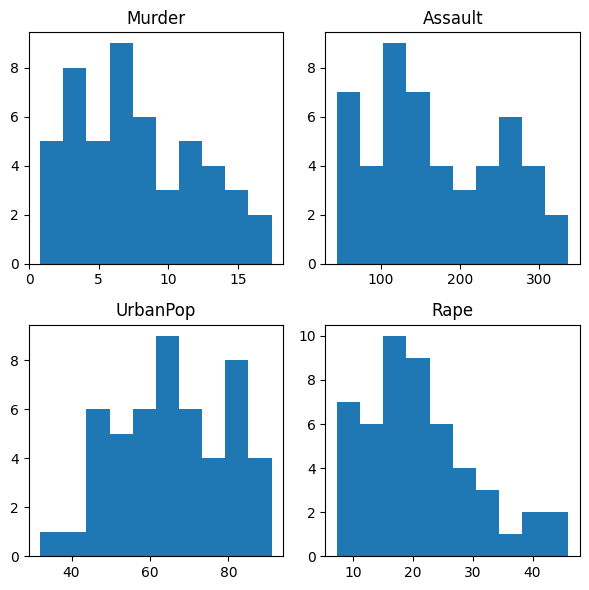

In [34]:
# Plot small histograms - needed for general shape
histograms = df.hist(grid=False, figsize=(6, 6)) 
plt.tight_layout()
plt.show()


## Correlation Analysis

Heatmap avoiding repeats

In [35]:
city_names = df.index
corr_df = df.corr()
labels =corr_df.columns

correlations = corr_df.corr()

C:\Users\Hannah Ridgment\AppData\Local\Temp\ipykernel_37208\3158453477.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = df.corr()


<AxesSubplot: >

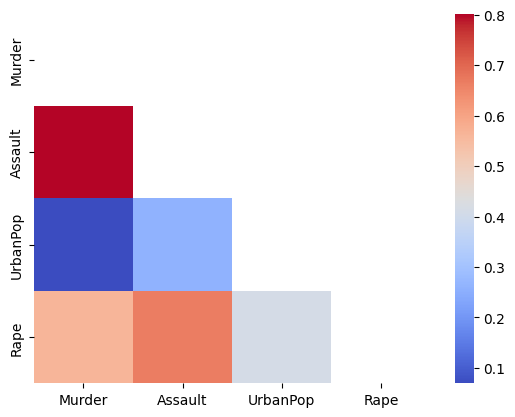

In [36]:
import numpy as np
import seaborn as sns
mask_ut=np.triu(np.ones(corr_df.shape)).astype(bool)
sns.heatmap(corr_df, mask=mask_ut, cmap="coolwarm")


The heatmap plot indicates that there are a number of strong correlations and some weaker correlations in the dataset. 

The dark blue square suggests a strong negative correlation between Murder and UrbanPop, this is potentially surprising as many people associate high murder rates with urban populations. The dark red suggests a strong positive correlation between Assault and Murder, this may be explained intuitively as most people would assume that murder is often accompanied by assault. It would also seem logical that in a violent society (more assualts) there may also be more murders.   


## PCA

In [37]:
#code based on the HyperionDev example_plots.ipynb
from sklearn.decomposition import PCA 

np.set_printoptions(precision=2)

X = df.drop(["City"],axis=1).values.squeeze()

pca = PCA()

X_trans = pca.fit_transform(X)

df_pca = pd.DataFrame(X_trans)
df_pca.head()

,0,1,2,3
0,64.80,11.45,-2.49,2.41
1,92.83,17.98,20.13,-4.09
2,124.07,-8.83,-1.69,-4.35
3,18.34,16.70,0.21,-0.52
4,107.42,-22.52,6.75,-2.81


In [38]:
#code based on the HyperionDev example_plots.ipynb
std = df_pca.describe().transpose()["std"]
print(f"Standard deviation: {std.values}")

Standard deviation: [83.73 14.21  6.49  2.48]


In [39]:
#code based on the HyperionDev example_plots.ipynb
print(f"Proportion of Variance Explained: {pca.explained_variance_ratio_}")

Proportion of Variance Explained: [9.66e-01 2.78e-02 5.80e-03 8.49e-04]


In [40]:
#code based on the HyperionDev example_plots.ipynb
print(f"Cumulative Proportion: {np.cumsum(pca.explained_variance_)}")

Cumulative Proportion: [7011.11 7213.11 7255.22 7261.38]


In [41]:
#code based on the HyperionDev example_plots.ipynb
def biplot(score,coeff,labels=None,points=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())

    fig, ax = plt.subplots()    

    ax.scatter(xs * scalex,ys * scaley,s=5)

    for i in range(0,len(xs)):
        txt = city_names[i]
        ax.annotate(txt, (xs[i]* scalex, ys[i]* scaley))

    for i in range(n):
        ax.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'green',alpha = 0.5)
        if labels is None:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'red', ha = 'center', va = 'center')
 
    plt.xlabel("Principal Comp 1")
    plt.ylabel("Principal Comp 2")
    plt.grid()


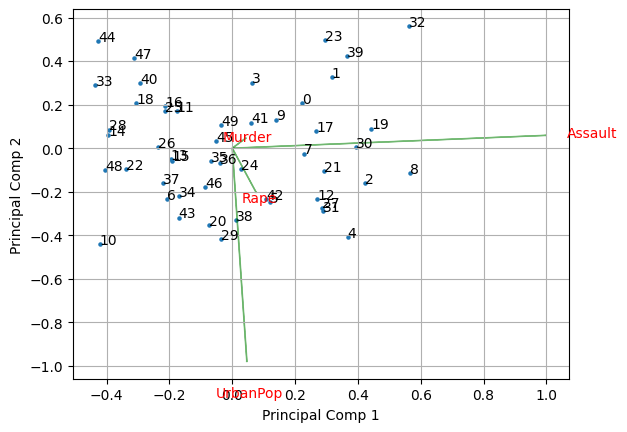

In [42]:
#code based on the HyperionDev example_plots.ipynb
biplot(X_trans[:,0:2],np.transpose(pca.components_[0:2, :]),list(labels),list(city_names))
plt.show()

This biplot indicates that UrbanPop and Assualt are the most significant features. 

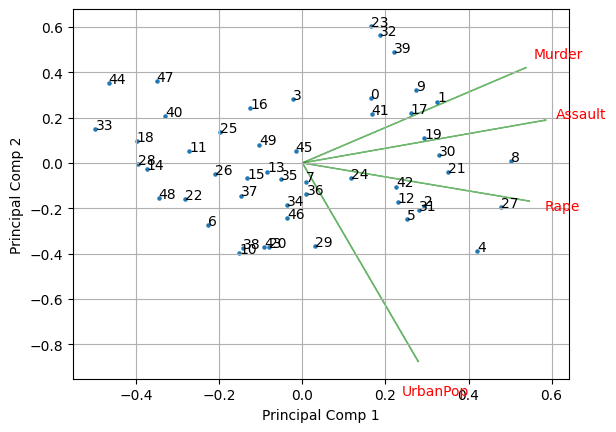

In [43]:
#code repeated from above - wasn't working
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA 
import seaborn as sns
%matplotlib inline
df = pd.read_csv("UsArrests.csv")
np.set_printoptions(precision=2)
X = df.drop(["City"],axis=1).values.squeeze()
pca = PCA()
X_trans = pca.fit_transform(X)
df_pca = pd.DataFrame(X_trans)

#standardise data 

X_std = StandardScaler().fit_transform(X)

std_pca = PCA()
X_std_trans = std_pca.fit_transform(X_std)

df_std_pca = pd.DataFrame(X_std_trans)

biplot(X_std_trans[:,0:2],np.transpose(std_pca.components_[0:2, :]),list(labels))
plt.show()

## Hierarchical clustering


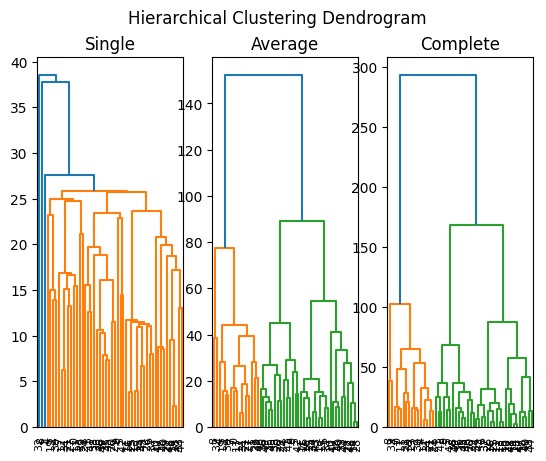

In [44]:
#code based on the HyperionDev example_plots.ipynb
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(df_pca)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Hierarchical Clustering Dendrogram')
ax1.set_title("Single")
dendrogram(linkage(df_pca, method='single'), labels=df_pca.index, ax=ax1) 
ax2.set_title("Average")
dendrogram(linkage(df_pca, method='average'), labels=df_pca.index, ax=ax2)
ax3.set_title("Complete")
dendrogram(linkage(df_pca, method='complete'), labels=df_pca.index, ax=ax3)
plt.show()

From these charts it appears that the average linkage method creates a more even dispersion. As this is what we are looking for this method appears most suitable for this dataset.  

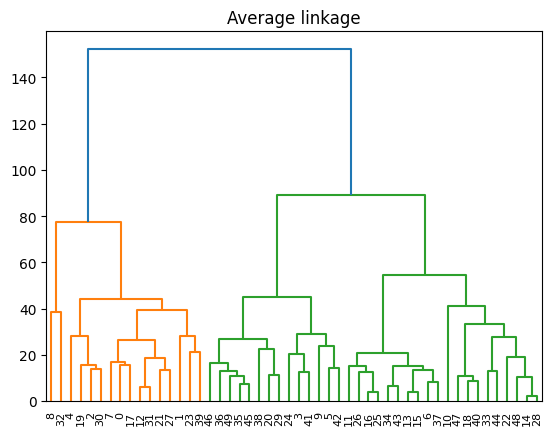

In [45]:
#code based on the HyperionDev example_plots.ipynb
plt.title("Average linkage")
dendrogram(linkage(df_pca, method='average'), labels=df_pca.index)
plt.show()

The dendrogram appears to show two main initial clusters, this suggests that there is a broad split in the cities, with two primary similarities. There are then six significant lower clusters of a similar height, this indicates that there are a number of relationships which could be explored and used to sort and explore the data.  The dendrogram can be used to highlight areas for further exploration and better understanding of the dataset.

Reference: https://wheatoncollege.edu/wp-content/uploads/2012/08/How-to-Read-a-Dendrogram-Web-Ready.pdf

C:\Users\Hannah Ridgment\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Hannah Ridgment\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Hannah Ridgment\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the

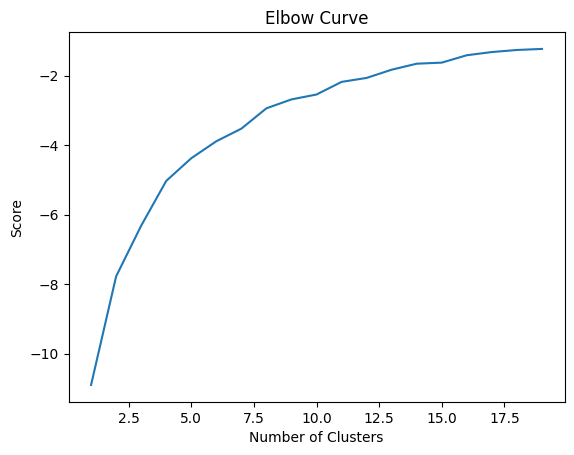

In [58]:
from sklearn import preprocessing
from sklearn.cluster import KMeans
# Scaling the data
minmax_processed = preprocessing.MinMaxScaler().fit_transform(df_pca)
df_pca.columns

df_numeric_scaled = pd.DataFrame(minmax_processed, index=df_pca.index, columns=df_pca.columns)

Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]

score = [kmeans[i].fit(df_numeric_scaled).score(df_numeric_scaled) for i in range(len(kmeans))]

plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

#reference: https://www.kaggle.com/code/vin1234/practical-interpretation-of-k-mean-clustering-algo

Elbow point appears to be 2.5 so either 2 or 3 could be used for k we will use 3 but 2 could also be useful for further exploration. 

### K-means clustering

C:\Users\Hannah Ridgment\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


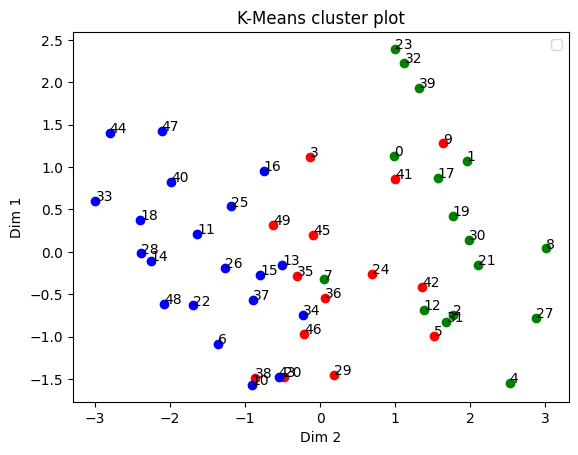

In [63]:
#code based on the HyperionDev example_plots.ipynb
from sklearn.cluster import KMeans

# We extract the first two components
x = X_std_trans[:,0]
y = X_std_trans[:,1]

# Fit k-means
k=3
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(df_pca)
cent = kmeans.cluster_centers_

# Plot clusters
fig, ax = plt.subplots()
colours = 'rbgy'
for i in range(0,k):
    ax.scatter(x[cluster_labels == i],y[cluster_labels == i],c = colours[i]) 

for i in range(0,len(x)):
        txt = city_names[i]
        ax.annotate(txt, (x[i], y[i]))
ax.set_title("K-Means cluster plot")
ax.set_xlabel("Dim 2")
ax.set_ylabel("Dim 1")
ax.legend()

There are 3 groups but these have considerable overlap - it appears there could be 2 groups or 3 groups with a large number of similarities (reduced space due to less difference)

Non-standardised - appears to give clearer clusters

C:\Users\Hannah Ridgment\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


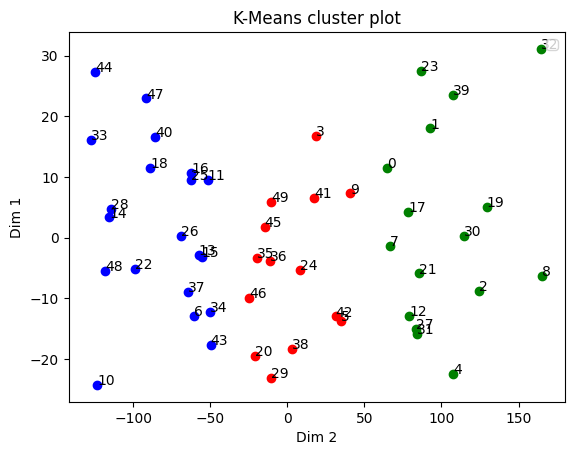

In [65]:
#code based on the HyperionDev example_plots.ipynb
from sklearn.cluster import KMeans

# We extract the first two components
x = X_trans[:,0]
y = X_trans[:,1]

# Fit k-means
k=3
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(df_pca)
cent = kmeans.cluster_centers_

# Plot clusters
fig, ax = plt.subplots()
colours = 'rbgy'
for i in range(0,k):
    ax.scatter(x[cluster_labels == i],y[cluster_labels == i],c = colours[i]) 

for i in range(0,len(x)):
        txt = city_names[i]
        ax.annotate(txt, (x[i], y[i]))
ax.set_title("K-Means cluster plot")
ax.set_xlabel("Dim 2")
ax.set_ylabel("Dim 1")
ax.legend()

In the non-standardised version there are three fairly distinct clusters, which are more distinct than when data is scaled. This suggests that in the non-standardised form there are larger differences, which is expected. Based on the underlying data it does not appear that there is a significant need for scaling, as the features are broadly comparable; therefore scaling could be causing unhelpful distortion. It appears that using the non-scaled data will be most meaningful with this data.  
The clustering is fairly dispersed and the clusters are not particularly compact. This suggests a relatively high degree of variability within each cluster. In addition, the clusters are very close together, this suggests that there are not large differences between the clusters. This may indicate that there are fundamental similarities (common features) across the set.  